<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bayesian-Decisions" data-toc-modified-id="Bayesian-Decisions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bayesian Decisions</a></span><ul class="toc-item"><li><span><a href="#The-Neyman-Pearson-Lemma-and-Optimality-arguments." data-toc-modified-id="The-Neyman-Pearson-Lemma-and-Optimality-arguments.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The Neyman Pearson Lemma and Optimality arguments.</a></span><ul class="toc-item"><li><span><a href="#Loss-functions,-Dominance-Arguments-and-Ratio-Tests" data-toc-modified-id="Loss-functions,-Dominance-Arguments-and-Ratio-Tests-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Loss functions, Dominance Arguments and Ratio Tests</a></span></li><li><span><a href="#The-Lemma:-True-Positive-and-False-Postive-Rates" data-toc-modified-id="The-Lemma:-True-Positive-and-False-Postive-Rates-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>The Lemma: True Positive and False Postive Rates</a></span></li></ul></li></ul></li><li><span><a href="#Example:-Supply-Chain" data-toc-modified-id="Example:-Supply-Chain-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Example: Supply Chain</a></span></li></ul></div>

In [1]:
import pymc3
import pandas as pd
import numpy as np

%matplotlib inline

import pymc3 as pm
import theano.tensor as tt
import pandas as pd
import numpy as np
from scipy import stats
import arviz as az
import matplotlib.pyplot as plt

# Bayesian Decisions

Without being overwhelmed we face an infinite horizon of future decisions. Most are made under uncertainty. A sequence of such decisions can compound or reduce that certainty, but we focus on the exaggerated drama of the momentous choice. Even when change is gradual and cumulative, history tells of a tale of pivot points, epic junctures and transformative events. Two paths diverge in a woods and we choose one. An array of possibilities suddenly open before us or collapse into a *cul de sac*. We weigh the options differently according to our needs and desires. Seeking to maximise our expected gains Leonard J. Savage showed that the optimal weights on each choice are proportional to their probabilities. In particular, he showed that if we reason with probabilities our outcomes will the dominate all other methods for mitigating uncertainty. 

## The Neyman Pearson Lemma and Optimality arguments.

Not all problems can be expressed with a generative probability model. More pertinently, even if the problem is expressable, it is a fine art to aptly approximate the real process in the lexicon of familiar probability distributions. But there are benefits to the effort. A probability model allows direct comparisons of theories about the data. If we postulate some explanatory theory which is parameterised with the vector $\mathbf{T_{\beta}}$, where $\beta$ is governed by an explicit probability model then we are able to state the ratio of likelihoods for any observed data comparing theories $\mathbf{T_{\beta}}, \mathbf{T_{\beta^{1}}}$.

$$ \frac{p( D | \mathbf{T}_{\beta^{1}})}{p(D | \mathbf{T}_{\beta})} $$

This style of comparison underwrites most decision rules as we set bounds on acceptable divergences. In particular, we see how the special case of the Neyman Pearson lemma (which underwrites most simple hypothesis testing) is an instance of a just such a liklihood ratio comparison. We follow the presentation of Moritz Hardt and Benjamin Recht in their *Patterns, Prediction and Actions*.

### Loss functions, Dominance Arguments and Ratio Tests
Imagine we frame the cost or loss of incorrectly choosing amongst our theories under uncertainty.Then the question becomes one of expected loss. Define $l(T, T_1)$ as the loss incurred when choosing $T$ when $T_1$ is true. Then the expected loss in light of the data is calculated as:


$$ (1):  E(l(T_{\beta} , T) | D) = 
l(T_{\beta} , T_{\beta})p(T_{\beta} | D) + l(T_{\beta} , T_{\beta^{1}})p(T_{\beta^{1}} | D) $$


$$ (2):  E(l(T_{\beta^{1}} , T) | D) = 
l(T_{\beta^{1}} , T_{\beta})p(T_{\beta} | D) + l(T_{\beta^{1}} , T_{\beta^{1}})p(T_{\beta^{1}} | D) $$

We want to choose the theory with least expected loss. Assume (1) $\geq$ (2), then

$$ l(T_{\beta} , T_{\beta})p(T_{\beta} | D) + l(T_{\beta} , T_{\beta^{1}})p(T_{\beta^{1}} | D) \geq l(T_{\beta^{1}} , T_{\beta})p(T_{\beta} | D) + l(T_{\beta^{1}} , T_{\beta^{1}})p(T_{\beta^{1}} | D) $$

manipulating:

$$ l(T_{\beta} , T_{\beta^{1}})p(T_{\beta^{1}} | D) \geq l(T_{\beta^{1}} , T_{\beta})p(T_{\beta} | D) -  l(T_{\beta} , T_{\beta})p(T_{\beta} | D) + l(T_{\beta^{1}} , T_{\beta^{1}})p(T_{\beta^{1}} | D) $$

grouping:

$$ l(T_{\beta} , T_{\beta^{1}})p(T_{\beta^{1}} | D) \geq p(T_{\beta} | D)(l(T_{\beta^{1}} , T_{\beta}) -  l(T_{\beta} , T_{\beta})) + l(T_{\beta^{1}} , T_{\beta^{1}})p(T_{\beta^{1}} | D) $$

rearraging:

$$ (l(T_{\beta} , T_{\beta^{1}}) - l(T_{\beta^{1}} , T_{\beta^{1}}))p(T_{\beta^{1}} | D)  \geq p(T_{\beta} | D)(l(T_{\beta^{1}} , T_{\beta}) -  l(T_{\beta} , T_{\beta})) $$

$$ p(T_{\beta^{1}} | D)  \geq p(T_{\beta} | D)\frac{(l(T_{\beta^{1}} , T_{\beta}) -  l(T_{\beta} , T_{\beta}))}{(l(T_{\beta} , T_{\beta^{1}}) - l(T_{\beta^{1}} , T_{\beta^{1}}))} $$

$$ \frac{p(T_{\beta^{1}} | D)}{p(T_{\beta} | D)}  \geq \frac{(l(T_{\beta^{1}} , T_{\beta}) -  l(T_{\beta} , T_{\beta}))}{(l(T_{\beta} , T_{\beta^{1}}) - l(T_{\beta^{1}} , T_{\beta^{1}}))} $$

which by Bayes Rule:

$$ \frac{\frac{p(D | T_{\beta^{1}})p(T_{\beta^{1}})}{p(D)}}{\frac{p(D | T_{\beta})p(T_{\beta})}{p(D)}} \geq \frac{(l(T_{\beta^{1}} , T_{\beta}) -  l(T_{\beta} , T_{\beta}))}{(l(T_{\beta} , T_{\beta^{1}}) - l(T_{\beta^{1}} , T_{\beta^{1}}))} $$

which cancels to become:

$$ \frac{p(D | T_{\beta^{1}})p(T_{\beta^{1}})}{p(D | T_{\beta})p(T_{\beta})} \geq \frac{(l(T_{\beta^{1}} , T_{\beta}) -  l(T_{\beta} , T_{\beta}))}{(l(T_{\beta} , T_{\beta^{1}}) - l(T_{\beta^{1}} , T_{\beta^{1}}))} \Rightarrow \frac{p(D | T_{\beta^{1}})}{p(D | T_{\beta})} \geq \frac{p(T_{\beta^{1}})(l(T_{\beta^{1}} , T_{\beta}) -  l(T_{\beta} , T_{\beta}))}{p(T_{\beta})(l(T_{\beta} , T_{\beta^{1}}) - l(T_{\beta^{1}} , T_{\beta^{1}}))} $$


which shows how each expected loss calculation between two theories reduces to a likelihood ratio test, where we have a specific threshold for accepted preference. The preferred theory dominates the other just when the ratio of their likelihood exceeds that threshold. Therefore our estimate of the correct theory $\hat{\mathbf{T}}$ is characterised by this comparison. 


$$ \hat{\mathbf{T}} = \mathbb{1} \Bigg\{  \frac{p( D | \mathbf{T}_{\beta^{1}})}{p(D | \mathbf{T}_{\beta})} \geq \eta \Bigg\} $$


Hardt and Recht show a number of the very familiar procedures reduce to likelihood ratio tests with more or less constraints on threshold priors or loss functions. For instance, the maximum a posteriori decision rule emerges naturally as a likelihood ratio test when we set the $l(T, T) = l(\neg T, \neg T) = 0$ and $l(T, \neg T) = l(\neg T, T) = 1$ This results in the following decision rule: 

$$ \hat{\mathbf{T}} = \mathbb{1} \Bigg\{  \frac{p( D | \mathbf{T}_{\beta^{1}})}{p(D | \mathbf{T}_{\beta})} \geq \frac{p(\mathbf{T_{\beta^{1}}})}{p(\mathbf{T_{\beta}})} \Bigg\} $$


### The Lemma: True Positive and False Postive Rates

In the binary classification case we can compare two hypotheses directly while aiming to maximise some measure of accuracy with a high probability. This requires that we express our decision rule as some selective mapping over our theories in light of the data. 

$$ \hat{\mathbf{T}}: \{ \mathbf{T_{\beta}}, \mathbf{T_{\beta^{1}}} \} \times D  \mapsto \{ 0, 1 \} $$ 

With this set up the Neyman Pearson lemma states that any attempt to optimise our rule so that we maximise the True positive rate (TPR) while we minimise our False positive rate (FPR) subject to a constraint is equivalent to a likelihood ratio test.

$$ \text{ maximise TPR: } p(\hat{\mathbf{T}} \text{ is True} | \mathbf{T_\beta}) $$ 
$$ \text{ subject to FPR: } p(\hat{\mathbf{T}} \text{ is True} | \mathbf{T_\beta^{1}}) \leq \alpha $$ 

This follows because the optimisation task does not require information about the prior probabilities. So we can choose a loss function such that the decision rule is equivalent to a simple likelihood ratio test. 

Lemma 1. **Neyman-Pearson Lemma** *The optimal probabilistic decision rule that maximizes TPR with an upper bound on FPR is a deterministic likelihood ratio test.*

This discussion serves to show the wide applicability of Bayesian decision theory and its implicit role in many of the typical frequentist decision rules. The role and flexibility of the priors in those decision rules suggests that it's better to be aware of the specification of the prior rather than assume their use is innocent. 

More positively the Bayesian approach to decision making benefits from our ability to sample directly from the posterior and evaluate probable loss across an entire range of the probability distribution. The gains of this perspective are often significant.

# Example: Supply Chain

This example is due to Thomas Wiecki's blog post on using Bayesian models to explore the decision distributions. 

In [5]:
SUPPLIER_YIELD = np.array([.9, .5, .8]) # unknown
SUPPLIER_YIELD_SD = np.array([.1, .2, .2]) # unknown
PRICES = [220.0, 100.0, 120.0] # known
MAX_ORDER_SIZE = [100, 80, 100] # known
N_OBS = [30, 20, 2]

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>, <AxesSubplot:>]], dtype=object)

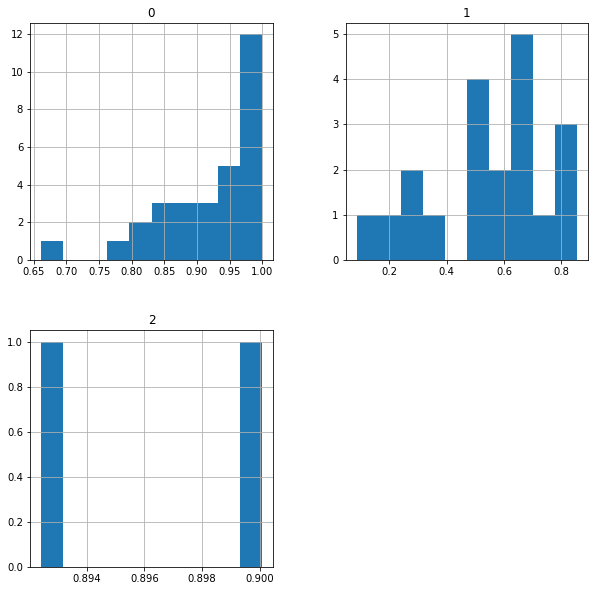

In [50]:
np.random.seed(100)
### Build an example data as draws from the Beta distribution
data = []
for supplier_yield, supplier_yield_sd, n_obs in zip(SUPPLIER_YIELD, SUPPLIER_YIELD_SD, N_OBS):
    data.append(pm.Beta.dist(mu=supplier_yield, sd=supplier_yield_sd, shape=n_obs).random())
    
data_df = pd.DataFrame(data).T
data_tidy = data_df.unstack().to_frame('yield')
data_tidy.index = data_tidy.index.set_names(['supplier', 'obs'])
data_df.hist(figsize=(10, 10))

An example loss function as impact on profit. 

In [14]:
SALES_PRICE = 500 
HOLDING_COST = 100

@np.vectorize
def loss(in_stock, demand, buy_price, sales_price=SALES_PRICE, holding_cost=HOLDING_COST):
    # How much do we earn per launch
    margin = sales_price - buy_price
    # Do we have more in stock than demanded?
    if in_stock > demand:
        total_profit = demand * margin
        # everything left over after demand was met goes into holding
        total_holding_cost = (in_stock - demand) * holding_cost
        reward = total_profit - total_holding_cost
    else:
        # Can only sell what we have in stock, no storage required
        reward = in_stock * margin
    
    # Usually we minimize, so invert
    return -reward

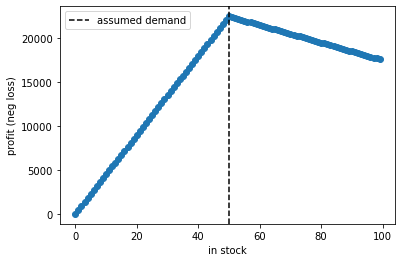

In [16]:
in_stock = np.arange(0, 100)
plt.scatter(in_stock, -loss(in_stock, 50, 50)); plt.axvline(50, c='k', ls='--', label='assumed demand');
plt.xlabel('in stock'); plt.ylabel('profit (neg loss)'); plt.legend();

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

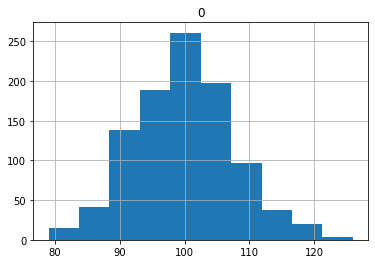

In [19]:
demand_samples = stats.poisson(60, 40).rvs(1000)
pd.DataFrame(demand_samples).hist()

Specify the beta binomial model and sample from the posterior distribuution. One draw from each supplier. 

In [20]:
with pm.Model() as model:
    # Priors on alpha and beta parameters for each supplier
    α = pm.HalfNormal('α', sd=10., shape=3) + 1
    β = pm.HalfNormal('β', sd=10., shape=3) + 1
    
    # Different likelihood for every supplier because we have different
    # number of data points
    for i, d in enumerate(data):
        pm.Beta(f'supplier_yield_obs_{i}', 
            alpha=α[i], beta=β[i],
            observed=d)
    
    trace = pm.sample()
with model:
    post_pred = pm.sample_posterior_predictive(trace, 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [00:02<00:00, 840.26draws/s] 
The number of effective samples is smaller than 25% for some parameters.
100%|██████████| 1000/1000 [00:02<00:00, 335.60it/s]


Plot the draws from the posteriors

array([[<AxesSubplot:title={'center':'supplier_yield_obs_0'}>,
        <AxesSubplot:title={'center':'supplier_yield_obs_1'}>],
       [<AxesSubplot:title={'center':'supplier_yield_obs_2'}>,
        <AxesSubplot:>]], dtype=object)

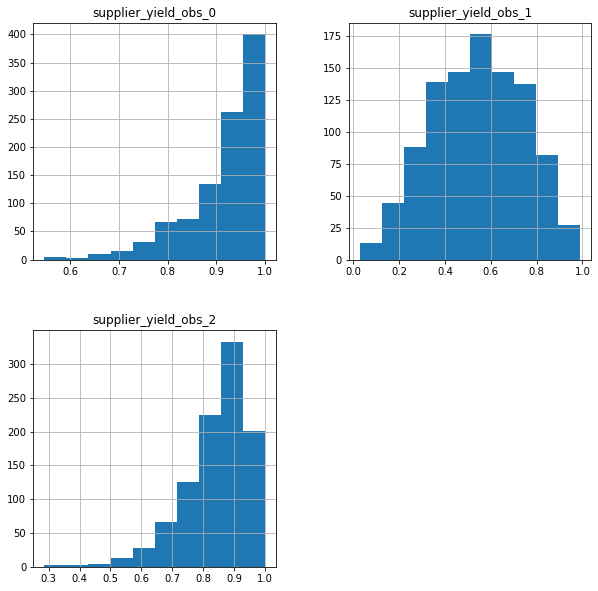

In [49]:
supplier_yield_post_pred = pd.DataFrame({k: v[:, 1] for k, v in post_pred.items()})
supplier_yield_post_pred.hist(figsize=(10, 10))

Function to calculate the full yield and price per item

In [24]:
def calc_yield_and_price(orders, 
                         supplier_yield=np.array([.9, .5, .8]),
                         prices=PRICES
                        ):
    orders = np.asarray(orders)
    
    full_yield = np.sum(supplier_yield * orders)
    price_per_item = np.sum(orders * prices) / np.sum(orders)
    
    return full_yield, price_per_item

### Arbitrary example input 
calc_yield_and_price([100, 60, 60])

(168.0, 160.0)

Optimise the settings to achieve best yield and price per item to minimise the lost profit

In [25]:
def objective(orders, supplier_yield=supplier_yield_post_pred,
              demand_samples=demand_samples, max_order_size=MAX_ORDER_SIZE):
    orders = np.asarray(orders)
    losses = []
    
    # Negative orders are impossible, indicated by np.inf
    if np.any(orders < 0):
        return np.inf
    # Ordering more than the supplier can ship is also impossible
    if np.any(orders > MAX_ORDER_SIZE):
        return np.inf
    
    # Iterate over post pred samples provided in supplier_yield
    for i, supplier_yield_sample in supplier_yield.iterrows():
        full_yield, price_per_item = calc_yield_and_price(
            orders,
            supplier_yield=supplier_yield_sample
        )
        
        # evaluate loss over each sample with one sample from the demand distribution
        loss_i = loss(full_yield, demand_samples[i], price_per_item)
        
        losses.append(loss_i)
        
    return np.asarray(losses)

In [26]:
from scipy import optimize

# parameters for the optimization, we're just including the max order sizes as bounds
bounds = [(0, max_order) for max_order in MAX_ORDER_SIZE]
starting_value = [50., 50., 50.]

# minimize the expected loss under all possible scenarios
opt_stoch = optimize.minimize(lambda *args: np.mean(objective(*args)), 
                              starting_value, 
                              bounds=bounds)

print('Optimal order amount from every supplier = {}'.format(np.ceil(opt_stoch.x)))

print('Total order amount from all suppliers = {}'.format(np.ceil(np.sum(opt_stoch.x))))

Optimal order amount from every supplier = [ 0. 55. 97.]
Total order amount from all suppliers = 151.0


In [29]:
supplier_yield_mean = pd.DataFrame([np.mean(d) for d in data]).T
supplier_yield_mean

opt_non_stoch = optimize.minimize(lambda *args: objective(*args, 
                                                          supplier_yield=supplier_yield_mean, 
                                                          demand_samples=[100]), 
                                  starting_value, 
                                  bounds=bounds)
print('Optimal order amount from every supplier = {}'.format(np.ceil(opt_non_stoch.x)))
print('Total order amount from all suppliers = {}'.format(np.ceil(np.sum(opt_non_stoch.x))))

Optimal order amount from every supplier = [42. 46. 42.]
Total order amount from all suppliers = 128.0


In [30]:
np.random.seed(123)
data_new = []
for supplier_yield, supplier_yield_sd, n_obs in zip(SUPPLIER_YIELD, SUPPLIER_YIELD_SD, N_OBS):
    data_new.append(pm.Beta.dist(mu=supplier_yield, sd=supplier_yield_sd, shape=1000).random())
data_new = pd.DataFrame(data_new).T
data_new.head().add_prefix("Supplier ")

,Supplier 0,Supplier 1,Supplier 2
0,0.880298,0.752686,0.997934
1,0.698046,0.307304,0.971085
2,0.676807,0.534287,0.891209
3,0.943773,0.666368,0.975907
4,0.911538,0.457898,0.556483


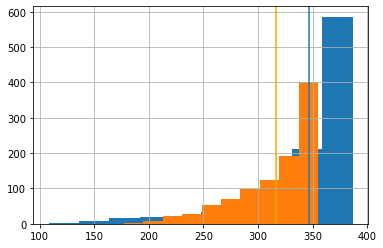

In [48]:
neg_loss_stoch = -objective(opt_stoch.x, supplier_yield=data_new) / demand_samples
neg_loss_non_stoch = -objective(opt_non_stoch.x, supplier_yield=data_new) / demand_samples
df = pd.concat([pd.DataFrame(neg_loss_stoch), pd.DataFrame(neg_loss_non_stoch)], axis=1)
df.columns = ['stochastic_loss', 'non-stochastic_loss']
df['stochastic_loss'].hist()
df['non-stochastic_loss'].hist()
plt.axvline(np.mean(neg_loss_stoch), label='expected stochastic')
plt.axvline(np.mean(neg_loss_non_stoch), color='orange', label='expected non-stochastic')
plt.show()

## Custom Example

In [83]:
RANDOM_SEED = 8924
np.random.seed(286)
az.style.use("arviz-darkgrid")

# unit loss calculation
def loss(booking_price, claim_cost, flat_cost=3):
    margin = booking_price - flat_cost - claim_cost
    return margin

# objective function to minimize over n-bookings
def objective(booking_price, claims_costs):
    losses = []
    ## Loop over sample losses due to posterior samples of claim costs
    for claim_cost_sample, booking_price_sample in zip(claim_costs, booking_price):
        unit_margin = loss(booking_price_sample, claim_cost_sample)
        losses.append(unit_margin)

    return np.asarray(losses)

def generate_location_data(n_locations, n_months):
    from string import ascii_lowercase
    from random import choice

    locations = []
    for i in range(n_locations):
        letters = ''.join([choice(ascii_lowercase) for _ in range(5)])
        locations.append(letters)
    
    dates = pd.date_range(start='2019-01-01', periods=n_months, freq='MS')
    pairs = [(loc, date) for loc in locations for date in dates]
    
    ## Get Booking Counts
    ## Monthly Means
    mus = [1000, 1500, 1700, 2000, 5000, 9000, 10000, 8000, 5000, 3000, 2000, 3000]
    sigmas = [500, 200, 100, 300, 1000, 3000, 2000, 1000, 500, 1000, 100, 500]
    ##  Sample Draws 
    params = [np.random.normal(mus[i], sigmas[i], 12) for i in range(len(dates))]
    bookings = [[k, str(dates[p]), np.random.poisson(params[p][p])] for k in locations 
    for p in range(len(dates))]
    return bookings
    ##
    ## Get lognormal claim costs
    mu, sigma = 3., 1. # mean and standard deviation
    scaling = 350
    costs = np.random.lognormal(mu, sigma, len(pairs)) + scaling 

    df = pd.DataFrame(bookings)
    df['claim_cost'] = costs
    return df

#df = generate_location_data(100, 12)
#df

np.random.randint()

array([1.45023933e-01, 2.33543708e-01, 4.15021981e-01, 3.04231158e-01,
       8.64517006e-01, 3.99799908e-01, 1.63379960e-01, 1.31640005e-02,
       9.39987267e-01, 9.08670898e-03, 2.58599937e-01, 5.60073824e-02,
       9.21681940e-01, 8.55372548e-01, 3.69693417e-01, 6.00410069e-01,
       6.54781621e-01, 8.60835485e-01, 1.60760583e-02, 1.17645210e-02,
       4.34710061e-01, 5.26341807e-01, 8.33247138e-01, 3.40120361e-01,
       4.69830802e-01, 6.79575636e-01, 1.02219114e-01, 8.52440224e-01,
       5.50408237e-01, 7.33239262e-01, 9.96207491e-01, 5.33263707e-01,
       1.54668500e-01, 1.29317295e-01, 3.74099316e-01, 2.60336164e-01,
       8.10935202e-01, 7.89364750e-01, 7.99240355e-01, 9.08557605e-01,
       4.30994616e-02, 1.52715706e-01, 6.98863053e-01, 3.43630056e-01,
       5.81573497e-01, 5.43502072e-01, 1.27521532e-01, 3.98995473e-02,
       7.20188289e-01, 4.04176240e-01, 3.86138144e-01, 2.18632195e-01,
       2.57700946e-01, 3.84562007e-01, 5.09527498e-01, 9.94361304e-01,
      